# Data Wrangling Project
## "We rate dogs"

In [2]:
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import os
from timeit import default_timer as timer

import matplotlib.pyplot as plt
%matplotlib inline

## Gather

Reading the file 'twitter-archive-enhanced.csv' into the dataframe 'twitter_archive'.

In [3]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

Downloading the file 'image-predictions.tsv' from the Udacity server and saving it to the folder 'data'.

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join('./',url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)
    
img_pred = pd.read_csv('image-predictions.tsv', sep='\t')

Setting up the Twitter API and trying to download the tweets that correspond to the Twitter IDs from twitter_archive.

In [18]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success


Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

Converting the JSON data into a pandas dataframe.

In [5]:
list_tweets_json = []

with open('tweet_json.txt', 'r') as json_file:
    
    for line in json_file:
        data = json.loads(line)

        data_id = data['id']
        data_retweet_count = data['retweet_count']
        data_favorite_count = data['favorite_count']

        json_data = {'tweet_id':data_id,
                    'retweet_count':data_retweet_count,
                    'favorite_count':data_favorite_count}
        list_tweets_json.append(json_data)
    
add_twitter_data = pd.DataFrame(list_tweets_json)    

After gathering the data I now have three dataframes:
1. `twitter_archive`: the enhanced twitter archive I manually downloaded from the resources area
2. `img_pred`: the image predictions file I downloaded programmatically from the Udacity server
3. `add_twitter_data`: the additional data I downloaded using the Twitter API

## Assess

### `twitter_archive`

In [5]:
twitter_archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
twitter_archive.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [7]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [6]:
twitter_archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

* `tweet_id`, `retweeted_status_id`, `in_reply_to_status_id` are int, `in_reply_to_user_id`, `retweeted_status_id` and `retweeted_status_user_id`, but should be str
* `timestamp` and `retweeted_status_timestamp` are str, but should be datetime
* As can be seen in head() the columns `doggo`, `fluffer`, `pupper` and `puppo` contain very often no values (None), should be replaced by NaN.
* Column names have no spaces, which makes it easier for the analysis as no bracketed notation is needed. But some names could be more descriptive.
* Some tweets are retweets (`retweeted_status_id`), but we only want to have original tweets.
* Some entries in `expanded_urls` have NaNs, i.e. tweets have no photos.
* There are four columns for the dogs stages, when it should only be one, so that each variable (dog stage) forms one column.
* Visual assessment of .tail() output shows that not all dogs names can be correct, column contains values like 'the', 'a', 'an' or none.

In [85]:
twitter_archive.retweeted_status_id.notnull().sum()

181

In [86]:
twitter_archive[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


Maximum values for both columns are very large, for the denominator the maximum is supposed to be 10. Up to the third quartile the values are still reasonable.

In [87]:
twitter_archive.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [88]:
twitter_archive.query('rating_numerator > 14').rating_numerator.value_counts().sum()

28

Only 28 values of the `rating_numurator` column are larger than 14, so these lines could be dropped without losing too much data.

In [31]:
twitter_archive.query('rating_denominator != 10').rating_denominator.value_counts().sum()

23

23 values for the denominator are different from the value 10.

In [90]:
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [96]:
twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
          ... 
Jerome       1
Tanner       1
Jessiga      1
Anthony      1
O            1
Name: name, Length: 957, dtype: int64

A value count for the `name` column shows that in 745 cases the name is missing and there are also cases without a valid name (here 'a'). Based on the visual assessment above of the dataframes tail it looks like these cases are all words in lower case.

In [129]:
mask = twitter_archive.name.str.islower()
twitter_archive[mask].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [13]:
twitter_archive[mask].name.value_counts().sort_index().sum()

109

Filtering for lowercase entries in the `names` column shows that there are 109 entries that are no valid names.

### `img_pred`

In [31]:
img_pred.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [32]:
img_pred.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [33]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [7]:
img_pred.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

* Several column names are not very descriptive (e.g. p1, p1_conf, p1_dog).
* Datatype for `tweet_id` is int, not str.

### `add_twitter_data`

In [34]:
add_twitter_data.head(10)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7709,36221
1,892177421306343426,5698,31242
2,891815181378084864,3777,23517
3,891689557279858688,7872,39515
4,891327558926688256,8483,37731
5,891087950875897856,2845,19008
6,890971913173991426,1848,11071
7,890729181411237888,17202,61030
8,890609185150312448,3913,26164
9,890240255349198849,6697,29902


In [35]:
add_twitter_data.tail(10)

,tweet_id,retweet_count,favorite_count
2321,666058600524156928,54,105
2322,666057090499244032,126,268
2323,666055525042405380,220,409
2324,666051853826850816,777,1124
2325,666050758794694657,51,125
2326,666049248165822465,39,96
2327,666044226329800704,132,272
2328,666033412701032449,41,112
2329,666029285002620928,42,121
2330,666020888022790149,462,2413


In [36]:
add_twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [8]:
add_twitter_data.dtypes

tweet_id          int64
retweet_count     int64
favorite_count    int64
dtype: object

In [38]:
add_twitter_data.duplicated().sum()

0

### Quality
#### `twitter_archive`
* `tweet_id`, `retweeted_status_id`, `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id` and `retweeted_status_user_id` are int, but should be str
* `timestamp` and `retweeted_status_timestamp` are str, but should be datetime
* As can be seen in head() the columns `doggo`, `floofer`, `pupper` and `puppo` contain very often no values (None), should be replaced by NaN.
* Column names have no spaces, which makes it easier for the analysis as no bracketed notation is needed. But some names could be more descriptive.
* Some tweets are retweets (`retweeted_status_id`), but we only want to have original tweets.
* Some entries in `expanded_urls` have NaNs, i.e. tweets have no photos.
* Visual assessment of .tail() output shows that not all dogs names can be correct, column contains values like 'the', 'a', 'an' or none. Filtering for lowercase entries in the `name` column shows that there are 109 entries that are no valid names. In another 745 cases the name is "None".
* 23 values for `rating_denominator` are not 10.
* There are some values for the numerator that exceed 10 by far. But altogether there are only 28 values larger than 14.

#### `img_pred`
* Several column names are not very descriptive (e.g. p1, p1_conf, p1_dog).
* Datatype for `tweet_id` is int, not str.

#### `add_twitter_data`
* Datatype for `tweet_id` is int, not str.

### Tidiness
#### `twitter_archive`
* There are four columns for the dogs stages, when it should only be one, so that each variable (dog stage) forms one column.

#### `img_pred`
* Dataframe has to be merged with the others, so that each type of observational unit forms a table.

#### `add_twitter_data`
* Dataframe has to be merged with the others, so that each type of observational unit forms a table.

#### All three dataframes
To follow the principles of tidy data, in this case the principle, that one observational unit must be in one table, all three dataframes have to be merged into one.

## Clean

#### First I will merge the three tables so that I do not have to clean them each. Therefore I do not need to make copies of the dataframes for cleaning.

##### Define
Merge dataframe `twitter_archive` with `img_pred` to `twitter_master`. After that merge `twitter_master` with `add_twitter_data`.

##### Code

In [85]:
twitter_master = pd.merge(twitter_archive, img_pred, on='tweet_id', how='left')
twitter_master = pd.merge(twitter_master, add_twitter_data, on='tweet_id', how='left')

##### Test

In [6]:
twitter_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7709.0,36221.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5698.0,31242.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3777.0,23517.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7872.0,39515.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8483.0,37731.0


In [40]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
jpg_url                       20

### Quality
#### Some tweets are retweets (`retweeted_status_id`), but we only want to have original tweets.
##### Define
Drop the lines containing non-null values for the columns `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`. These are the retweets.

##### Code

In [86]:
twitter_master = twitter_master[twitter_master.retweeted_status_id.isna()]

##### Test

In [87]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
jpg_url                       1994 non

Note: In a reassessment the columns columns `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestam`p could be dropped as they do not contain any data anymore are of no help to the analysis.

#### `tweet_id`, `retweeted_status_id`, `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id` and `retweeted_status_user_id`,  are int, but should be str
##### Define
Change datatypes for 
* `tweet_id`
* `in_reply_to_status_id`
* `in_reply_to_user_id`
* `retweeted_status_id`
* `retweeted_status_user_id`

to str.

Because als NaNs will be converted to strings "nan" I will afterwards replace all these strings with numpy NaNs.

##### Code

In [88]:
twitter_master.tweet_id = twitter_master.tweet_id.astype(str)
twitter_master.in_reply_to_status_id = twitter_master.in_reply_to_status_id.astype(str)
twitter_master.in_reply_to_user_id = twitter_master.in_reply_to_user_id.astype(str)
twitter_master.retweeted_status_id = twitter_master.retweeted_status_id.astype(str)
twitter_master.retweeted_status_user_id = twitter_master.retweeted_status_user_id.astype(str)

twitter_master = twitter_master.replace('nan', np.nan)

##### Test

In [10]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
jpg_url                       1994 non

#### ` timestamp` and `retweeted_status_timestamp` are str, but should be datetime
##### Define
Change the columns `timestamp` and `retweeted_status_timestamp` from str to datetime.

##### Code

In [89]:
twitter_master.timestamp = pd.to_datetime(twitter_master['timestamp'])
twitter_master.retweeted_status_timestamp = pd.to_datetime(twitter_master['retweeted_status_timestamp'])

##### Test

In [12]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2175 non-null datetime64[ns, UTC]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
jpg_url           

#### As can be seen in head() the columns `doggo`, `floofer`, `pupper` and `puppo` contain very often no values (None), should be replaced by NaN.
##### Define
Change values 'None' to NaN in these columns.

##### Code

In [90]:
twitter_master.doggo.replace(to_replace=['None'], value=np.nan, inplace=True)
twitter_master.floofer.replace(to_replace=['None'], value=np.nan, inplace=True)
twitter_master.pupper.replace(to_replace=['None'], value=np.nan, inplace=True)
twitter_master.puppo.replace(to_replace=['None'], value=np.nan, inplace=True)

##### Test

In [13]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2175 non-null datetime64[ns, UTC]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         87 non-null object
floofer                       10 non-null object
pupper                        234 non-null object
puppo                         25 non-null object
jpg_url                  

#### Column names have no spaces, which makes it easier for the analysis as no bracketed notation is needed. But some names could be more descriptive.
##### Define
Rename to following columns to:
* `text` to `tweet_text`
* `name` to `dogs_name`

##### Code

In [91]:
twitter_master.rename(columns={'text':'tweet_text',
                              'name':'dogs_name',
                              'img_num':'number_of_images'},
                     inplace=True)

##### Test

In [12]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null object
timestamp                     2175 non-null datetime64[ns, UTC]
source                        2175 non-null object
tweet_text                    2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
dogs_name                     2175 non-null object
doggo                         87 non-null object
floofer                       10 non-null object
pupper                        234 non-null object
puppo                         25 non-null object
jpg_url                  

#### Some entries in `expanded_urls` have NaNs, i.e. these tweets have no photos.
##### Define
Drop the lines where the `column expanded_urls` contains no value (is NaN).

##### Code

In [92]:
twitter_master.dropna(subset=['expanded_urls'], inplace=True)

##### Test

In [17]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2117 non-null object
in_reply_to_status_id         23 non-null object
in_reply_to_user_id           23 non-null object
timestamp                     2117 non-null datetime64[ns, UTC]
source                        2117 non-null object
tweet_text                    2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
dogs_name                     2117 non-null object
doggo                         84 non-null object
floofer                       10 non-null object
pupper                        232 non-null object
puppo                         24 non-null object
jpg_url                  

#### Visual assessment of .tail() output shows that not all dogs names can be correct, teh column contains values like 'the', 'a', 'an' or none. Filtering for lowercase entries in the `name` column shows that there are 109 entries that are no valid names. In another 745 cases the name is "None".
##### Define
Change lower case entries and 'None' entries in the `name` column to numpy NaNs.

##### Code

In [93]:
# Change lower case entries
mask = twitter_master.dogs_name.str.islower()
twitter_master.loc[mask, 'dogs_name'] = np.nan

# Change 'None' entries
twitter_master.dogs_name = twitter_master.dogs_name.replace('None', np.nan)

##### Test

In [21]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2117 non-null object
in_reply_to_status_id         23 non-null object
in_reply_to_user_id           23 non-null object
timestamp                     2117 non-null datetime64[ns, UTC]
source                        2117 non-null object
tweet_text                    2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
dogs_name                     1391 non-null object
doggo                         84 non-null object
floofer                       10 non-null object
pupper                        232 non-null object
puppo                         24 non-null object
jpg_url                  

In [15]:
twitter_master.dogs_name.str.islower().sum()

0

#### 23 values for `rating_denominator` are not 10.
##### Define
Drop lines where `rating_denominator` does not equal '10'

##### Code

In [95]:
twitter_master.drop(twitter_master[twitter_master.rating_denominator != 10].index, inplace = True)

##### Test

In [96]:
twitter_master.query('rating_denominator != 10').rating_denominator.value_counts().sum()

0

#### There are some values for the numerator that exceed 10 by far. But altogether there are only 28 values larger than 14.
##### Define
Drop the lines that contain values greater than 14 in the `rating_numerator` column.

##### Code

In [97]:
twitter_master.drop(twitter_master[twitter_master.rating_numerator > 14].index, inplace = True)

##### Test

In [98]:
twitter_master.query('rating_numerator > 14').rating_numerator.value_counts().sum()

0

In [22]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2094 non-null object
in_reply_to_status_id         22 non-null object
in_reply_to_user_id           22 non-null object
timestamp                     2094 non-null datetime64[ns, UTC]
source                        2094 non-null object
tweet_text                    2094 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2094 non-null object
rating_numerator              2094 non-null int64
rating_denominator            2094 non-null int64
dogs_name                     1385 non-null object
doggo                         84 non-null object
floofer                       10 non-null object
pupper                        231 non-null object
puppo                         24 non-null object
jpg_url                  

#### Several column names (from the  `img_pred` dataframe) are not very descriptive (e.g. p1, p1_conf, p1_dog).
##### Define
Change column names to more descriptive ones.

##### Code

In [99]:
twitter_master.rename(columns={'p1':'prediction_1',
                               'p1_conf':'prediction_1_confidence',
                               'p1_dog':'prediction_1_is_dog',
                               'p2':'prediction_2',
                               'p2_conf':'prediction_2_confidence',
                               'p2_dog':'prediction_2_is_dog',
                               'p3':'prediction_3',
                               'p3_conf':'prediction_3_confidence',
                               'p3_dog':'prediction_3_is_dog',},
                      inplace=True)

##### Test

In [100]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 30 columns):
tweet_id                      2094 non-null object
in_reply_to_status_id         22 non-null object
in_reply_to_user_id           22 non-null object
timestamp                     2094 non-null datetime64[ns, UTC]
source                        2094 non-null object
tweet_text                    2094 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2094 non-null object
rating_numerator              2094 non-null int64
rating_denominator            2094 non-null int64
dogs_name                     1385 non-null object
doggo                         84 non-null object
floofer                       10 non-null object
pupper                        231 non-null object
puppo                         24 non-null object
jpg_url                  

#### Datatype for` tweet_id` is int, not str (former dataframes `img_pred` and `ad_twitter_data`)
This has become obsolete by  merging the dataframes in the beginning of the cleaning process.

### Tidiness
#### Because I dropped a number of lines I first have to re-index the dataframe
##### Define
Re-index the datafram `twitter_master`.

##### Code

In [101]:
twitter_master.reset_index(drop=True, inplace =True)

##### Test

In [23]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 30 columns):
tweet_id                      2094 non-null object
in_reply_to_status_id         22 non-null object
in_reply_to_user_id           22 non-null object
timestamp                     2094 non-null datetime64[ns, UTC]
source                        2094 non-null object
tweet_text                    2094 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2094 non-null object
rating_numerator              2094 non-null int64
rating_denominator            2094 non-null int64
dogs_name                     1385 non-null object
doggo                         84 non-null object
floofer                       10 non-null object
pupper                        231 non-null object
puppo                         24 non-null object
jpg_url                  

#### There are four columns for the dogs stages, when it should only be one, so that each variable (dog stage) forms one column.
##### Define
Transform the columns `doggo`, `floofer`, `pupper` and  `puppo` into one column. Afterwards drop the columns `doggo`, `floofer`, `pupper`, `puppo`.

##### Code

In [102]:
for row in range(0, len(twitter_master)):
    if twitter_master.loc[row, 'doggo'] == 'doggo':
        twitter_master.loc[row, 'dogs_stage'] = 'doggo'
    elif twitter_master.loc[row, 'floofer'] == 'floofer':
        twitter_master.loc[row, 'dogs_stage'] = 'floofer'
    elif twitter_master.loc[row, 'pupper'] == 'pupper':
        twitter_master.loc[row, 'dogs_stage'] = 'pupper'
    elif twitter_master.loc[row, 'puppo'] == 'puppo':
        twitter_master.loc[row, 'dogs_stage'] = 'puppo'
    else:
        twitter_master.loc[row, 'dogs_stage'] = np.nan
        
to_drop = ['doggo', 'floofer', 'pupper', 'puppo']
twitter_master.drop(to_drop, axis=1, inplace=True)

In [103]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 27 columns):
tweet_id                      2094 non-null object
in_reply_to_status_id         22 non-null object
in_reply_to_user_id           22 non-null object
timestamp                     2094 non-null datetime64[ns, UTC]
source                        2094 non-null object
tweet_text                    2094 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2094 non-null object
rating_numerator              2094 non-null int64
rating_denominator            2094 non-null int64
dogs_name                     1385 non-null object
jpg_url                       1971 non-null object
number_of_images              1971 non-null float64
prediction_1                  1971 non-null object
prediction_1_confidence       1971 non-null float64
prediction_1_is_

##### Test

In [104]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 27 columns):
tweet_id                      2094 non-null object
in_reply_to_status_id         22 non-null object
in_reply_to_user_id           22 non-null object
timestamp                     2094 non-null datetime64[ns, UTC]
source                        2094 non-null object
tweet_text                    2094 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2094 non-null object
rating_numerator              2094 non-null int64
rating_denominator            2094 non-null int64
dogs_name                     1385 non-null object
jpg_url                       1971 non-null object
number_of_images              1971 non-null float64
prediction_1                  1971 non-null object
prediction_1_confidence       1971 non-null float64
prediction_1_is_

## Re-Assess

After the cleaning process there might be some more issues that are caused by the cleaning (apart from the fact that I have not addressed all issues in the first place). So I will have a final look.

In [105]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 27 columns):
tweet_id                      2094 non-null object
in_reply_to_status_id         22 non-null object
in_reply_to_user_id           22 non-null object
timestamp                     2094 non-null datetime64[ns, UTC]
source                        2094 non-null object
tweet_text                    2094 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2094 non-null object
rating_numerator              2094 non-null int64
rating_denominator            2094 non-null int64
dogs_name                     1385 non-null object
jpg_url                       1971 non-null object
number_of_images              1971 non-null float64
prediction_1                  1971 non-null object
prediction_1_confidence       1971 non-null float64
prediction_1_is_

In [106]:
twitter_master.describe()

,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,number_of_images,prediction_1_confidence,prediction_2_confidence,prediction_3_confidence,retweet_count,favorite_count
count,0.0,0.0,2094.000000,2094.0,1971.00000,1971.000000,1.971000e+03,1.971000e+03,2087.000000,2087.000000
mean,NaN,NaN,10.615568,10.0,1.20345,0.593893,1.348851e-01,6.019792e-02,2505.339243,8312.568280
std,NaN,NaN,2.165129,0.0,0.56164,0.272043,1.008800e-01,5.081204e-02,4401.669314,12112.802759
min,NaN,NaN,0.000000,10.0,1.00000,0.044333,1.011300e-08,1.740170e-10,11.000000,70.000000
25%,NaN,NaN,10.000000,10.0,1.00000,0.361530,5.409535e-02,1.605405e-02,555.000000,1840.000000
50%,NaN,NaN,11.000000,10.0,1.00000,0.587764,1.186220e-01,4.948690e-02,1216.000000,3795.000000
75%,NaN,NaN,12.000000,10.0,1.00000,0.844583,1.957615e-01,9.164355e-02,2861.500000,10361.000000
max,NaN,NaN,14.000000,10.0,4.00000,1.000000,4.880140e-01,2.710420e-01,77827.000000,156302.000000


In [107]:
twitter_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,tweet_text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,prediction_1_is_dog,prediction_2,prediction_2_confidence,prediction_2_is_dog,prediction_3,prediction_3_confidence,prediction_3_is_dog,retweet_count,favorite_count,dogs_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,7709.0,36221.0,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,5698.0,31242.0,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,3777.0,23517.0,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7872.0,39515.0,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,8483.0,37731.0,NaN


In [28]:
twitter_master.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,tweet_text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,prediction_1_dog,prediction_2,prediction_2_confidence,prediction_2_dog,prediction_3,prediction_3_confidence,prediction_3_is_dog,retweet_count,favorite_count,dogs_stage
2089,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666049248...,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,39.0,96.0,NaN
2090,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666044226...,...,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,132.0,272.0,NaN
2091,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666033412...,...,True,malinois,0.138584,True,bloodhound,0.116197,True,41.0,112.0,NaN
2092,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666029285...,...,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,42.0,121.0,NaN
2093,666020888022790149,NaN,NaN,2015-11-15 22:32:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666020888...,...,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,462.0,2413.0,NaN


* Because I deleted all rows containing data for retweets these columns now do not hold any data anymore. These can be dropped.
* The column `rating_denominator` has only values of 10 and can be deleted.
* As there is no column `rating_denominator` anmyore, the column `rating_numerator` can be renamed.
* I also want the column `dogs_stage` right after the `dogs_name` column where the four stages colums used to be.

## Clean
#### Columns for retweets do not hold any data anymore.
##### Define
Drop the columns `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`.
##### Code

In [108]:
twitter_master.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace =True)

##### Test

In [109]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 24 columns):
tweet_id                   2094 non-null object
in_reply_to_status_id      22 non-null object
in_reply_to_user_id        22 non-null object
timestamp                  2094 non-null datetime64[ns, UTC]
source                     2094 non-null object
tweet_text                 2094 non-null object
expanded_urls              2094 non-null object
rating_numerator           2094 non-null int64
rating_denominator         2094 non-null int64
dogs_name                  1385 non-null object
jpg_url                    1971 non-null object
number_of_images           1971 non-null float64
prediction_1               1971 non-null object
prediction_1_confidence    1971 non-null float64
prediction_1_is_dog        1971 non-null object
prediction_2               1971 non-null object
prediction_2_confidence    1971 non-null float64
prediction_2_is_dog        1971 non-null object
prediction_3       

#### The column `rating_denominator` has only values of 10 and can be deleted.
##### Define
Drop the `rating_denominator`.
##### Code

In [110]:
twitter_master.drop('rating_denominator', axis=1, inplace =True)

##### Test

In [63]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 23 columns):
tweet_id                   2094 non-null object
in_reply_to_status_id      22 non-null object
in_reply_to_user_id        22 non-null object
timestamp                  2094 non-null datetime64[ns, UTC]
source                     2094 non-null object
tweet_text                 2094 non-null object
expanded_urls              2094 non-null object
rating_numerator           2094 non-null int64
dogs_name                  1385 non-null object
dogs_stage                 337 non-null object
jpg_url                    1971 non-null object
number_of_images           1971 non-null float64
prediction_1               1971 non-null object
prediction_1_confidence    1971 non-null float64
prediction_1_dog           1971 non-null object
prediction_2               1971 non-null object
prediction_2_confidence    1971 non-null float64
prediction_2_dog           1971 non-null object
prediction_3       

#### As there is no column `rating_denominator` anmyore, the column `rating_numerator` can be renamed.
##### Define
Rename the column `rating_numerator` to `rating`.
##### Code

In [111]:
twitter_master.rename(columns={'rating_numerator':'rating'}, inplace=True)

##### Test

In [65]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 23 columns):
tweet_id                   2094 non-null object
in_reply_to_status_id      22 non-null object
in_reply_to_user_id        22 non-null object
timestamp                  2094 non-null datetime64[ns, UTC]
source                     2094 non-null object
tweet_text                 2094 non-null object
expanded_urls              2094 non-null object
rating                     2094 non-null int64
dogs_name                  1385 non-null object
dogs_stage                 337 non-null object
jpg_url                    1971 non-null object
number_of_images           1971 non-null float64
prediction_1               1971 non-null object
prediction_1_confidence    1971 non-null float64
prediction_1_dog           1971 non-null object
prediction_2               1971 non-null object
prediction_2_confidence    1971 non-null float64
prediction_2_dog           1971 non-null object
prediction_3       

#### `dogs_stage` should right after the `dogs_name` column where the four stages colums used to be.
##### Define
Re-index the columns in the desired order.
##### Code

In [112]:
twitter_master = twitter_master.reindex(columns=['tweet_id',
                                                 'in_reply_to_status_id',
                                                 'in_reply_to_user_id',
                                                 'timestamp',
                                                 'source',
                                                 'tweet_text',
                                                 'expanded_urls', 
                                                 'rating',
                                                 'dogs_name',
                                                 'dogs_stage',
                                                 'jpg_url',
                                                 'number_of_images',
                                                 'prediction_1',
                                                 'prediction_1_confidence',
                                                 'prediction_1_is_dog',
                                                 'prediction_2',
                                                 'prediction_2_confidence',
                                                 'prediction_2_is_dog', 
                                                 'prediction_3',
                                                 'prediction_3_confidence',
                                                 'prediction_3_is_dog',
                                                 'retweet_count',
                                                 'favorite_count'])

##### Test

In [113]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2094 entries, 0 to 2093
Data columns (total 23 columns):
tweet_id                   2094 non-null object
in_reply_to_status_id      22 non-null object
in_reply_to_user_id        22 non-null object
timestamp                  2094 non-null datetime64[ns, UTC]
source                     2094 non-null object
tweet_text                 2094 non-null object
expanded_urls              2094 non-null object
rating                     2094 non-null int64
dogs_name                  1385 non-null object
dogs_stage                 337 non-null object
jpg_url                    1971 non-null object
number_of_images           1971 non-null float64
prediction_1               1971 non-null object
prediction_1_confidence    1971 non-null float64
prediction_1_is_dog        1971 non-null object
prediction_2               1971 non-null object
prediction_2_confidence    1971 non-null float64
prediction_2_is_dog        1971 non-null object
prediction_3       

## Storing the data

In [114]:
twitter_master.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

## Analysis
### Distribution of the ratings values
First I want to take a look at how the ratings are distributed.

Text(0, 0.5, 'Rating')

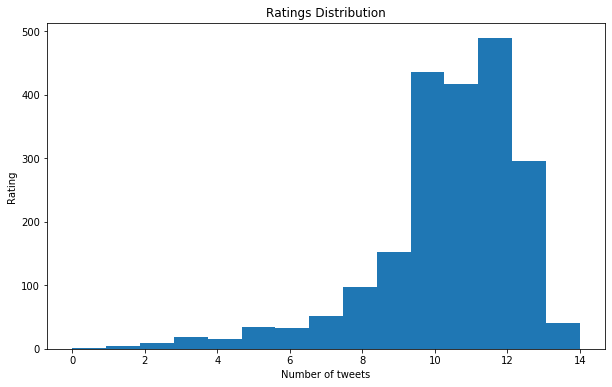

In [115]:
twitter_master['rating'].plot(kind = 'hist', bins=15, figsize=(10,6));

plt.title('Ratings Distribution')
plt.xlabel('Number of tweets')
plt.ylabel('Rating')

The ratings are clearly not normally distributed, but left skewed. The median is with 11 slightly above the mean with about 10.62 (see below).

In [116]:
twitter_master.rating.describe()

count    2094.000000
mean       10.615568
std         2.165129
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating, dtype: float64

### Dog's stages

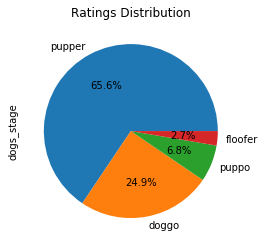

In [130]:
twitter_master.dogs_stage.value_counts().plot(kind='pie', autopct='%1.1f%%');

plt.title('Ratings Distribution');

Of the cases where there is a stage given, almost two thirds are puppers and a quarter are doggos. Puppos and floofers combined make up for less than 10 percent.

### Scatter matrix

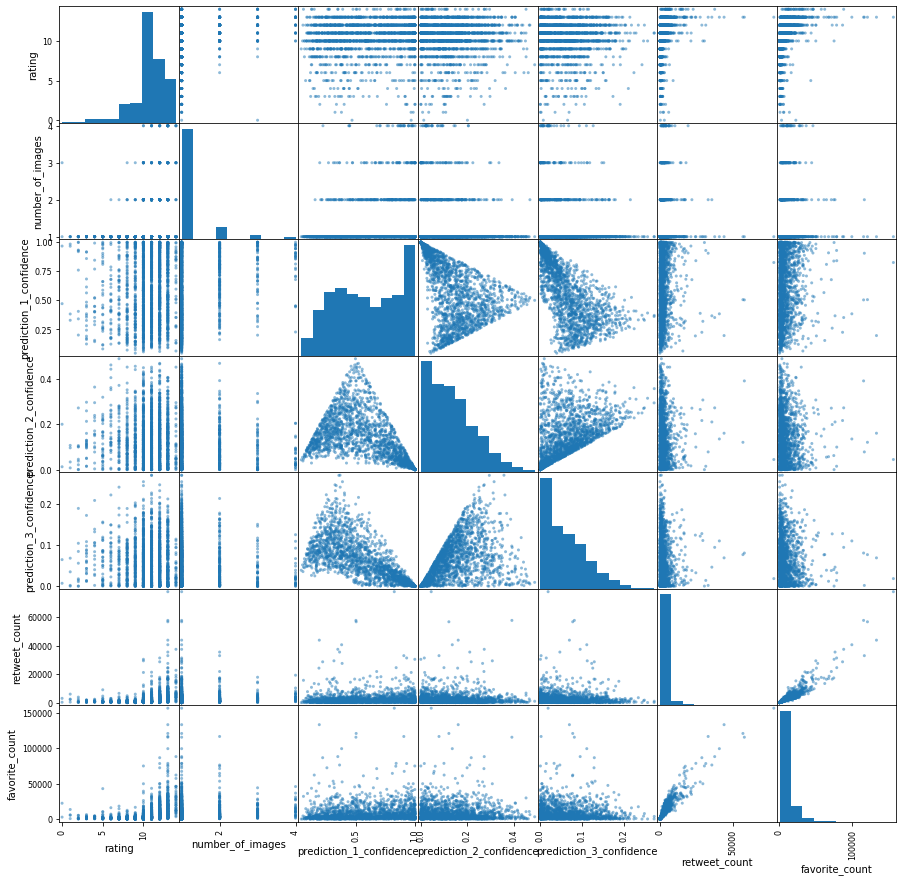

In [51]:
pd.plotting.scatter_matrix(twitter_master, figsize=(15,15));

The only correlation that catches the eye here is between favorite counts and retweet counts. 

### Most popular breeds
I would like to find out which breeds are the most popular. Therefor I have to introduce a new column 'breed' which holds the most likely breed from the predictions table.

In [129]:
condlist = [(twitter_master['prediction_1_is_dog'] == True),
            (twitter_master['prediction_2_is_dog'] == True),
            (twitter_master['prediction_3_is_dog'] == True)]

choicelist = [twitter_master['prediction_1'],
              twitter_master['prediction_2'],
              twitter_master['prediction_3']]

twitter_master['breed'] = np.select(condlist, choicelist, default = 'none')

# Source: https://numpy.org/doc/stable/reference/generated/numpy.select.html

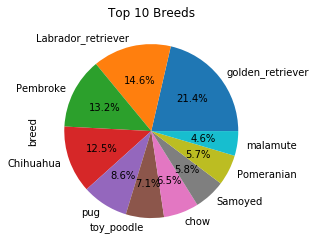

In [128]:
twitter_master.query('breed !=  "none"').breed.value_counts().head(10).plot(kind='pie', autopct='%1.1f%%');

plt.title('Top 10 Breeds');

The most popular breeds are retrievers. In the top 10 of breeds Golden retrievers and Labrador retrievers together make up more than one third of all dogs.

### Conclusion
* The ratings are clearly not normally distributed, but left skewed. The median is with 11 slightly above the mean with about 10.62.
* Of the cases where there is a stage given, almost two thirds are puppers and a quarter are doggos. Puppos and floofers combined make up for less than 10 percent.
* The scatter matrix shows a correlation between favorite counts and retweet counts.
* The most popular breeds are retrievers. In the top 10 of breeds Golden retrievers and Labrador retrievers together make up more than one third of all dogs.

### Sources
* Bernd Klein, "Numerisches Python", 2019
* Wes McKinney, "Datenanalyse mit Python - Auswertung von Daten mti Pandas, NumPy und IPython", 2019 (orig. "Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython", 2018)


* www.numpy.org
* www.stackoverflow.com
